# Base Model

As a first simple model we use a linear regression without any feature optimization or hyperparameter tuning. In this sense we will use the default values.

In [1]:
# import the necessary libraries we need for the analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

RSEED =  42

In [2]:
import sys;
sys.path.insert(0,'..')
import project_fun as prj

In [3]:
df = pd.read_csv('../data/Train_cleaned.csv', sep=";")
df

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,target,hour_STA,hour_STD,...,season_num,outcome,country_arr,elevation_arr,lat_arr,lon_arr,country_dep,elevation_dep,lat_dep,lon_dep
0,2016-01-03 00:00:00,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,12,10,...,3,1,TN,22,36.851002,10.22720,MA,656,33.367500,-7.58997
1,2016-01-13 00:00:00,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,TU 31BIMO,20.0,16,15,...,3,1,TN,22,36.851002,10.22720,IT,768,45.630600,8.72811
2,2016-01-16 00:00:00,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,TU 32AIMN,0.0,6,4,...,3,0,TR,325,41.275333,28.75200,TN,22,36.851002,10.22720
3,2016-01-17 00:00:00,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,TU 736IOK,0.0,17,14,...,3,0,FR,90,47.153198,-1.61073,TN,19,33.875000,10.77550
4,2016-01-17 00:00:00,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,TU 320IMU,22.0,15,14,...,3,1,DZ,82,36.691002,3.21541,TN,22,36.851002,10.22720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107167,2018-07-05 00:00:00,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,TU 32AIML,0.0,2,23,...,1,0,TN,22,36.851002,10.22720,TN,22,36.851002,10.22720
107168,2018-01-13 00:00:00,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,UG AT7AT7,0.0,9,8,...,3,0,TN,22,36.851002,10.22720,TN,19,33.875000,10.77550
107169,2018-11-07 00:00:00,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,TU 736IOK,0.0,12,5,...,2,0,TN,22,36.851002,10.22720,TN,22,36.851002,10.22720
107170,2018-01-23 00:00:00,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,TU CR9ISA,0.0,18,18,...,3,0,TN,19,33.875000,10.77550,TN,22,36.851002,10.22720


## Setup data

#### Feature Encoding

To use the countries as input features, we need to convert their abbreviations to numbers, i.e. performing label encoding.

In [4]:
# 1) encode departure countries
le1 = LabelEncoder()
le1.fit(df['country_dep'])
le1.transform(df['country_dep'])
df['country_dep'] = le1.transform(df['country_dep'])

# 2) encode arrival countries
le2 = LabelEncoder()
le2.fit(df['country_arr'])
le2.transform(df['country_arr'])
df['country_arr'] = le2.transform(df['country_arr'])

#### Spliting data

In [5]:
# Define features and target
y = df['target']
X = df[['country_dep','country_arr','hour_STD','month','year','day_of_week','scheduled_time_duration']]

# Split the features and target data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED, train_size = .8)

## Trainining the model

In [6]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make prediction 
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Calculate r-squared 
print("R-squared (train):", r2_score(y_train, y_pred_train).round(3))
print("R-squared (test):", r2_score(y_test, y_pred_test).round(3))

# Calculate RMSE
print("RMSE (train): ", mean_squared_error(y_train, y_pred_train, squared=False).round(3))
print("RMSE (test): ", mean_squared_error(y_test, y_pred_test, squared=False).round(3))

R-squared (train): 0.018
R-squared (test): 0.018
RMSE (train):  116.26
RMSE (test):  112.602


## Error analysis

In [8]:
# Calculate r-squared and RMSE
print("Base Model:")
print("---"*10)
prj.calculate_metrics(y_train,y_pred_train, y_test, y_pred_test)

Base Model:
------------------------------
Metrics on training data
RMSE: 116.26
R2: 0.018
------------------------------
Metrics on test data
RMSE: 112.602
R2: 0.018
------------------------------


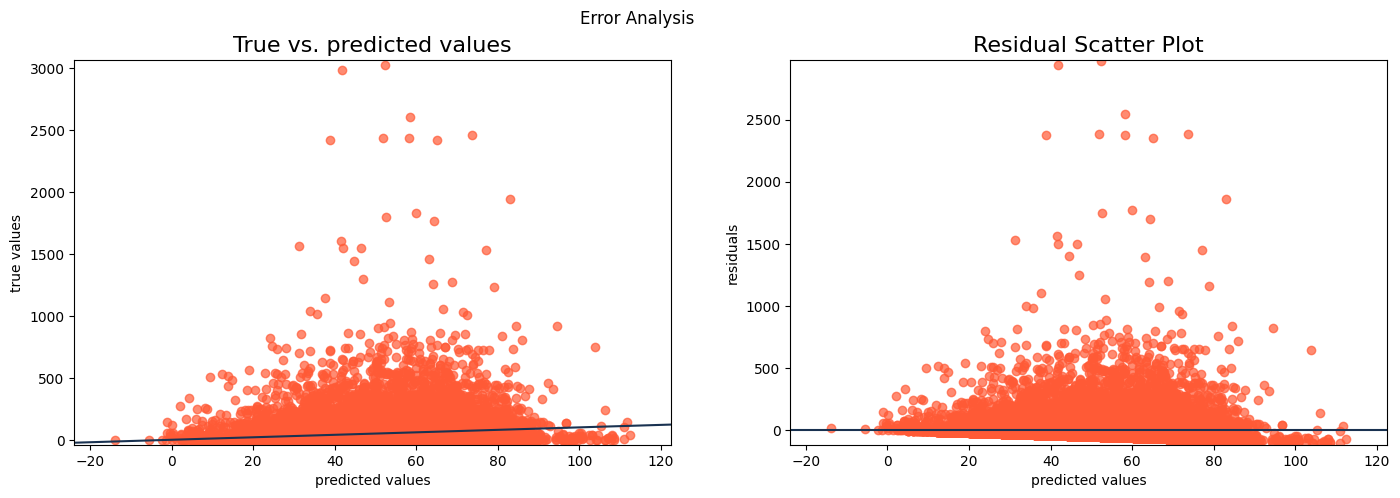

In [9]:
prj.error_analysis(y_test, y_pred_test)